In [2]:
import os
os.environ['OPENAI_API_KEY']=""
openai_api_key = os.environ.get("OPENAI_API_KEY")
if not openai_api_key:
    raise ValueError("The environment variable OPENAI_API_KEY is not set. Please make sure to set it.")

In [3]:
!pip install langchain_openai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 412.2/412.2 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 35.2 MB/s eta 0:00:00
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.29
    Uninstalling langchain-core-0.3.29:
      Successfully uninstalled langchain-core-0.3.29


In [4]:
!pip install langgraph

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.0/147.0 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.7/44.7 kB 3.4 MB/s eta 0:00:00


In [5]:
from langchain_openai import ChatOpenAI
from langchain_core.tools import tool
from langgraph.graph import StateGraph, MessagesState, START, END
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt.tool_validator import ValidationNode


In [6]:
!pip install langchain_community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 26.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 43.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.8/50.8 kB 3.5 MB/s eta 0:00:00
  Attempting uninstall: langchain
    Found existing installation: langchain 0.3.14
    Uninstalling langchain-0.3.14:
      Successfully uninstalled langchain-0.3.14


In [7]:
from langchain.chat_models import ChatOpenAI
from langchain_core.tools import tool
from langgraph.graph import StateGraph, MessagesState, START, END
from langgraph.prebuilt import ToolNode


In [ ]:
!apt-get install graphviz graphviz-dev # Install Graphviz using apt
!pip install pygraphviz

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Note, selecting 'libgraphviz-dev' instead of 'graphviz-dev'
graphviz is already the newest version (2.42.2-6ubuntu0.1).
The following additional packages will be installed:
  libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common libgvc6-plugins-gtk
  librsvg2-common libxdot4
Suggested packages:
  gvfs
The following NEW packages will be installed:
  libgail-common libgail18 libgraphviz-dev libgtk2.0-0 libgtk2.0-bin libgtk2.0-common
  libgvc6-plugins-gtk librsvg2-common libxdot4
0 upgraded, 9 newly installed, 0 to remove and 49 not upgraded.
Need to get 2,434 kB of archives.
After this operation, 7,681 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libgtk2.0-common all 2.24.33-2ubuntu2.1 [125 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libgtk2.0-0 amd64 2.24.33-2ubuntu2.1 [2,038 kB]
Get:3 http://a

In [ ]:
!pip install --upgrade langgraph



# Iteration 3

In [8]:

import pandas as pd

# Define the Imagenow Tool
@tool
def imagenow_tool(invoice_id: str):
    """Check payment status in Imagenow."""

    # Load the Imagenow dataset
    imagenow_file_path = "/content/image_now_modified.xlsx"  # Replace with actual file path
    imagenow_df = pd.read_excel(imagenow_file_path)

    # Find the corresponding row based on the invoice_id
    invoice_data = imagenow_df[imagenow_df["Invoice Number"] == invoice_id]

    # If the invoice is found, return the status
    if not invoice_data.empty:
        payment_status = invoice_data.iloc[0]["Status"]
        return {
            "status": payment_status
        }
    else:
        return {"error": f"Invoice {invoice_id} not found."}

# Define the Lawson Tool
@tool
def lawson_tool(invoice_id: str):
    """Fetch payment details from Lawson based on the invoice ID."""

    # Load the Lawson dataset
    lawson_file_path = "/content/lawson_modified.xlsx"  # Replace with actual file path
    lawson_df = pd.read_excel(lawson_file_path)

    # Find the corresponding row based on the invoice_id
    invoice_data = lawson_df[lawson_df["Invoice ID"] == invoice_id]

    # If the invoice is found, return the relevant payment details
    if not invoice_data.empty:
        payment_method = invoice_data.iloc[0]["Payment Method"]
        payment_date = invoice_data.iloc[0]["Payment Date"]
        exception_status = invoice_data.iloc[0]["Exception Status"]
        return {
            "payment_method": payment_method,
            "payment_date": payment_date,
            "exception_status": exception_status,
        }
    else:
        return {"error": f"Invoice {invoice_id} not found."}

# Define the Ivalua Tool
@tool
def ivalua_tool(invoice_id: str):
    """Check transmission status in Ivalua based on the invoice ID."""

    # Load the Ivalua dataset
    ivalua_file_path = "/content/ivalua_dataset.xlsx"  # Replace with the actual file path
    ivalua_df = pd.read_excel(ivalua_file_path)

    # Lookup the transmission and exception status for the given invoice
    invoice_row = ivalua_df[ivalua_df["Invoice Number"] == invoice_id]

    # If the invoice is found, return transmission and exception status
    if not invoice_row.empty:
        transmission_status = invoice_row.iloc[0]["Transmission Status"]
        exception_status = invoice_row.iloc[0]["Exception status"]
        return {
            "transmission_status": transmission_status,
            "exception_status": exception_status
        }
    else:
        return {"error": f"Invoice {invoice_id} not found in Ivalua."}

# Define the Email Tool
@tool
def email_tool(recipient: str, message: str):
    """Send an email to the vendor or team."""
    return {"email_status": "Sent"}

# List of tools
tools = [imagenow_tool, lawson_tool, ivalua_tool, email_tool]

# Initialize the LLM and bind the tools



In [9]:
from typing import Annotated, Sequence, TypedDict
from langchain_core.messages import BaseMessage
from langgraph.graph.message import add_messages

class AgentState(TypedDict):
    """The state of the agent."""
    messages: Annotated[Sequence[BaseMessage], add_messages]  # Reducer for messages

In [10]:
import json
from langchain_core.messages import ToolMessage

# Create a mapping of tools by name
tools_by_name = {tool.name: tool for tool in tools}

# Tool node for processing tool calls
def tool_node(state: AgentState):
    outputs = []
    for tool_call in state["messages"][-1].tool_calls:
        tool_result = tools_by_name[tool_call["name"]].invoke(tool_call["args"])
        outputs.append(
            ToolMessage(
                content=json.dumps(tool_result),
                name=tool_call["name"],
                tool_call_id=tool_call["id"],
            )
        )
    return {"messages": outputs}

In [11]:
import json
from langchain_core.messages import ToolMessage

# Create a mapping of tools by name
tools_by_name = {tool.name: tool for tool in tools}
def tool_node(state: AgentState):
    outputs = []
    for tool_call in state["messages"][-1].tool_calls:
        tool_result = tools_by_name[tool_call["name"]].invoke(tool_call["args"])

        # Convert Timestamp objects to strings before serialization
        for key, value in tool_result.items():
            if isinstance(value, pd.Timestamp):
                tool_result[key] = value.isoformat()  # Convert to ISO format string

        outputs.append(
            ToolMessage(
                content=json.dumps(tool_result),
                name=tool_call["name"],
                tool_call_id=tool_call["id"],
            )
        )
    return {"messages": outputs}

In [12]:
from langchain_openai import ChatOpenAI
from langchain_core.messages import SystemMessage
from langchain_core.runnables import RunnableConfig

# Define the workflow steps
steps_prompt = """
You are an AI orchestrator for the Payment Inquiry workflow. Follow these steps to process the query:

1. Check the payment status in Imagenow using the invoice ID.
2. If the status is "Paid":
   - Fetch payment details (method and date) from Lawson.
   - Respond to the vendor with the payment details.
   - Update the notes in Imagenow.
3. If the status is "Not Paid":
   - Determine whether the PO is a 10-digit or 11-digit number.
   - For an 11-digit PO:
       - Check transmission status in Ivalua.
       - If not transmitted, notify the appropriate person and update the notes.
       - If transmitted, check exception status in Lawson.
   - For a 10-digit PO:
       - Check exception status in Lawson.
       - Notify the appropriate person based on the exception status.
4. At each step, use the appropriate tool and reason about the next action based on the tool's result.
"""

# Initialize the LLM and bind tools
model = ChatOpenAI(model="gpt-4", temperature=0).bind_tools(tools)

# Define the LLM node
def call_model(state: AgentState, config: RunnableConfig):
    # Combine the steps prompt with the original system message
    system_prompt = SystemMessage(
        content=f"{steps_prompt}\n\nYou are a workflow orchestrator for Payment Inquiry. Decide which tool to use or provide a final answer based on the query."
    )
    response = model.invoke([system_prompt] + state["messages"], config)
    return {"messages": [response]}

In [13]:
def should_continue(state: AgentState):
    messages = state["messages"]
    last_message = messages[-1]

    # Continue if there are pending tool calls
    if last_message.tool_calls:
        return "tools"
    return "end"

In [14]:
# ipython-input-48-22d05b2e512c
from langgraph.graph import StateGraph, END

# Initialize the StateGraph
workflow = StateGraph(AgentState)

# Add nodes
workflow.add_node("agent", call_model)
workflow.add_node("tools", tool_node)

# Set entry point
workflow.set_entry_point("agent")

# Add conditional edges, use 'tools' instead of 'continue'
workflow.add_conditional_edges("agent", should_continue, {"tools": "tools", "end": END})

# Add edge from tools back to agent
workflow.add_edge("tools", "agent")
# Compile the workflow
graph = workflow.compile()

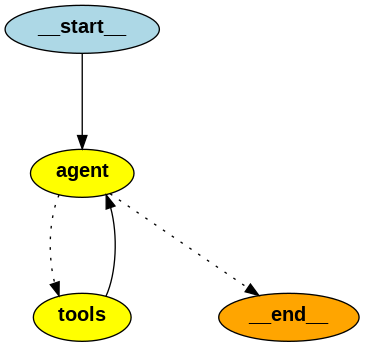

In [ ]:
from IPython.display import Image

# Assuming `graph.get_graph()` provides a graph object and `.draw_png()` generates a PNG image
# Visualize the graph in a Jupyter notebook
Image(app.get_graph().draw_png())

In [18]:
# Helper function for formatting the output stream
def print_stream(stream):
    for s in stream:
        message = s["messages"][-1]
        if isinstance(message, tuple):
            print(message)
        else:
            message.pretty_print()

# Define user query
inputs = {"messages": [("user", "Check the payment status of invoice INV-0003.PO number is 77649657916")]}

# Execute the workflow
print_stream(graph.stream(inputs, stream_mode="values"))

================================ Human Message =================================

Check the payment status of invoice INV-0003.PO number is 77649657916
================================== Ai Message ==================================
Tool Calls:
  imagenow_tool (call_nUMczoqYmBluSOA6GI9BgtWZ)
 Call ID: call_nUMczoqYmBluSOA6GI9BgtWZ
  Args:
    invoice_id: INV-0003
================================= Tool Message =================================
Name: imagenow_tool

{"status": "Not Paid"}
================================== Ai Message ==================================

The PO number is an 11-digit number. Let's check the transmission status in Ivalua.
Tool Calls:
  ivalua_tool (call_dcMg73TXyga93YMDF0LwfM1X)
 Call ID: call_dcMg73TXyga93YMDF0LwfM1X
  Args:
    invoice_id: INV-0003
================================= Tool Message =================================
Name: ivalua_tool

{"transmission_status": "Not Transmitted", "exception_status": "MA126"}
================================== Ai Me

In [25]:
# Helper function for formatting the output stream
def print_stream(stream):
    for s in stream:
        message = s["messages"][-1]
        if isinstance(message, tuple):
            print(message)
        else:
            message.pretty_print()

# Define user query
inputs = {"messages": [("user", "Check the payment status of invoice INV-0002.PO number is 8752760620")]}

# Execute the workflow
print_stream(graph.stream(inputs, stream_mode="values"))

================================ Human Message =================================

Check the payment status of invoice INV-0002.PO number is 8752760620
================================== Ai Message ==================================
Tool Calls:
  imagenow_tool (call_PFpBqUbcAl47eXXWKdQyRkzm)
 Call ID: call_PFpBqUbcAl47eXXWKdQyRkzm
  Args:
    invoice_id: INV-0002
================================= Tool Message =================================
Name: imagenow_tool

{"status": "Not Paid"}
================================== Ai Message ==================================

The PO number is a 10-digit number. Let's check the exception status in Lawson.
Tool Calls:
  lawson_tool (call_dfujxYyCRICfQYsxuvWlGLcv)
 Call ID: call_dfujxYyCRICfQYsxuvWlGLcv
  Args:
    invoice_id: INV-0002
================================= Tool Message =================================
Name: lawson_tool

{"payment_method": "Check", "payment_date": "2019-05-01T00:00:00", "exception_status": "AP90"}
======================

In [15]:
# Helper function for formatting the output stream
def print_stream(stream):
    for s in stream:
        message = s["messages"][-1]
        if isinstance(message, tuple):
            print(message)
        else:
            message.pretty_print()

# Define user query
inputs = {"messages": [("user", "Check the payment status of invoice INV-0016.PO number is 21185544688")]}

# Execute the workflow
print_stream(graph.stream(inputs, stream_mode="values"))

================================ Human Message =================================

Check the payment status of invoice INV-0016.PO number is 21185544688
================================== Ai Message ==================================
Tool Calls:
  imagenow_tool (call_ctswNNlbyOxS33SNvyfT1uL8)
 Call ID: call_ctswNNlbyOxS33SNvyfT1uL8
  Args:
    invoice_id: INV-0016
================================= Tool Message =================================
Name: imagenow_tool

{"status": "Not Paid"}
================================== Ai Message ==================================

The PO number is an 11-digit number. Let's check the transmission status in Ivalua.
Tool Calls:
  ivalua_tool (call_bDguK7xSZNU6MPOeCYi65Bto)
 Call ID: call_bDguK7xSZNU6MPOeCYi65Bto
  Args:
    invoice_id: INV-0016
================================= Tool Message =================================
Name: ivalua_tool

{"transmission_status": "Not Transmitted", "exception_status": "MA126"}
================================== Ai Me

In [16]:
# Helper function for formatting the output stream
def print_stream(stream):
    for s in stream:
        message = s["messages"][-1]
        if isinstance(message, tuple):
            print(message)
        else:
            message.pretty_print()

# Define user query
inputs = {"messages": [("user", "Check the payment status of invoice INV-0001.PO number is 47687632524")]}

# Execute the workflow
print_stream(graph.stream(inputs, stream_mode="values"))

================================ Human Message =================================

Check the payment status of invoice INV-0001.PO number is 47687632524
================================== Ai Message ==================================
Tool Calls:
  imagenow_tool (call_v6I9gIAoED7cK0eHyVLCO7XQ)
 Call ID: call_v6I9gIAoED7cK0eHyVLCO7XQ
  Args:
    invoice_id: INV-0001
================================= Tool Message =================================
Name: imagenow_tool

{"status": "Paid"}
================================== Ai Message ==================================
Tool Calls:
  lawson_tool (call_bzuD4ALpP4osaXeQysy81uBc)
 Call ID: call_bzuD4ALpP4osaXeQysy81uBc
  Args:
    invoice_id: INV-0001
================================= Tool Message =================================
Name: lawson_tool

{"payment_method": "check", "payment_date": "2020-01-12T00:00:00", "exception_status": NaN}
================================== Ai Message ==================================
Tool Calls:
  email_tool (ca